In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
import dalex as dx

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

import xgboost as xgb
import numpy as np
from typing import Tuple
from sklearn.metrics import balanced_accuracy_score, accuracy_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import sympy as sp

import numpy as np
import xgboost as xgb
from typing import Tuple

import matplotlib.pyplot as plt

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [196]:
def gradient(predt: np.ndarray, dtrain: xgb.DMatrix, lambda_: float, f: np.ndarray) -> np.ndarray:
    y = dtrain.get_label()
    return 2 * (predt - y) + 2 * lambda_ * (predt - f)

def hessian(predt: np.ndarray, dtrain: xgb.DMatrix, lambda_:float, f: np.ndarray) -> np.ndarray:
    # y = dtrain.get_label()
    return 2 + 2 * lambda_

def obj_sq(predt: np.ndarray, dtrain: xgb.DMatrix) -> Tuple[np.ndarray, np.ndarray]:
    # df = pd.DataFrame(dtrain.get_data().toarray())
    # df.columns = dtrain.feature_names
    X_train = pd.DataFrame(dtrain.get_data().toarray())
    X_train.columns = dtrain.feature_names
    y_train = dtrain.get_label()

    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)

    # accuracy_score(y_test, pred >= 0.5)
    # print(y_test)
    # print(pred)

    exp = dx.Explainer(rf, X_train, y_train, label = "Titanic Random Forest Pipeline")
    pdp = exp.model_profile(variables = ['num__age'])#, 'num__fare'])
    pdp_results = pdp.result
    # # pdp.plot(geom='profiles')

    # # plt.scatter(df._x_, df._yhat_)
    # # plt.xlabel('x')
    # # plt.ylabel('yhat')

    f = pdp_results[['_x_', '_yhat_']]
    f.columns = ['x', 'yhat']

    # f = np.ones_like(predt)
    # df = pd.DataFrame(dtrain.get_data().toarray())
    # df.columns = dtrain.feature_names
    plt.scatter(X_train['num__age'], predt, c='r', s=1)
    plt.scatter(f['x'], f['yhat'], c='b', s=1)
    plt.show()

    df['x'] = df['num__age']
    df['interpolated'] = True
    f['interpolated'] = False
    combined_df = pd.concat([f[['x', 'yhat', 'interpolated']], df[['x', 'interpolated']]])
    combined_df = combined_df.sort_values(by='x')

    display(combined_df)
    combined_df['yhat'] = combined_df['yhat'].interpolate(method='linear')

    display(combined_df)

    plt.scatter(combined_df['x'], combined_df['yhat'], c=combined_df['interpolated'])
    plt.show()

    print('df shape:', df.shape)
    print('f shape:', f.shape)
    print('combined_df shape:', combined_df.shape)

    f = combined_df[combined_df['interpolated'] == True]['yhat'].values

    print('f shape:', f.shape)

    lambda_ = 100
    grad = gradient(predt, dtrain, lambda_, f)
    hess = hessian(predt, dtrain, lambda_, f)
    if type(hess) in [int, float]:
        hess = hess*np.ones_like(grad)
    return grad, hess


# df = pd.DataFrame(dtrain.get_data().toarray())
# df.columns = dtrain.feature_names
# df
# # plt.scatter(df['num__age'], np.ones_like(df['num__age']), c='r', s=1)
# # plt.scatter(f['_x_'], f['_yhat_'], c='b', s=1)

# df['x'] = df['num__age']
# df['interpolated'] = True
# f['interpolated'] = False
# f['x'] = f['_x_']
# combined_df = pd.concat([f[['x', '_yhat_', 'interpolated']], df[['x', 'interpolated']]])
# combined_df = combined_df.sort_values(by='x')

# display(combined_df)
# combined_df['_yhat_'] = combined_df['_yhat_'].interpolate(method='linear')

# display(combined_df)

# plt.scatter(combined_df['x'], combined_df['_yhat_'], c=combined_df['interpolated'])
# plt.show()

Preparation of a new explainer is initiated

  -> data              : 1765 rows 17 cols
  -> target variable   : 1765 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic Random Forest Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001CEE0AB00E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.325, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.788, mean = -0.000556, max = 0.908
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


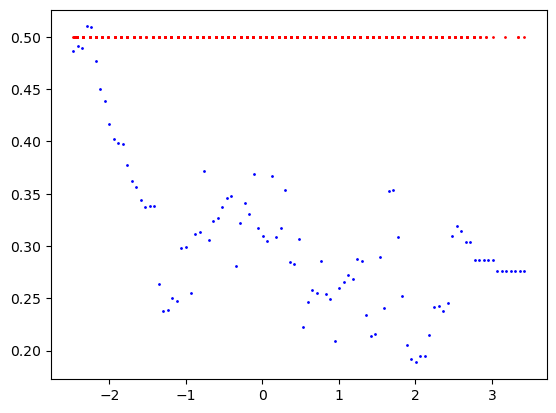

,x,yhat,interpolated
0,-2.470467,0.486864,False
265,-2.470467,NaN,True
427,-2.456751,NaN,True
1120,-2.456751,NaN,True
633,-2.443035,NaN,True
...,...,...,...
1523,3.338184,NaN,True
1192,3.338184,NaN,True
99,3.361569,0.275981,False
694,3.420479,NaN,True


,x,yhat,interpolated
0,-2.470467,0.486864,False
265,-2.470467,0.487101,True
427,-2.456751,0.487339,True
1120,-2.456751,0.487576,True
633,-2.443035,0.487813,True
...,...,...,...
1523,3.338184,0.275981,True
1192,3.338184,0.275981,True
99,3.361569,0.275981,False
694,3.420479,0.275981,True


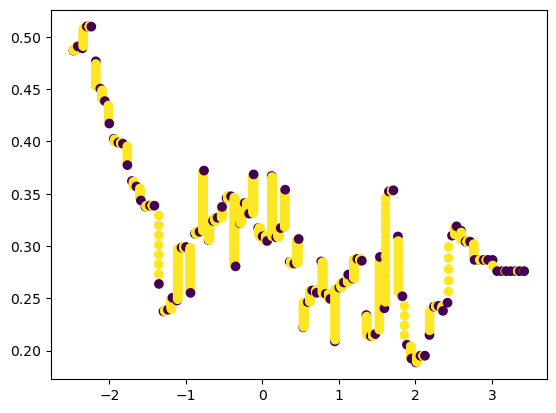

df shape: (1765, 19)
f shape: (101, 3)
combined_df shape: (1866, 3)
f shape: (1765,)
[0]	train-auc:0.68059	test-auc:0.69518
Preparation of a new explainer is initiated

  -> data              : 1765 rows 17 cols
  -> target variable   : 1765 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic Random Forest Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001CEE0AB00E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.324, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.784, mean = 0.000512, max = 0.897
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]


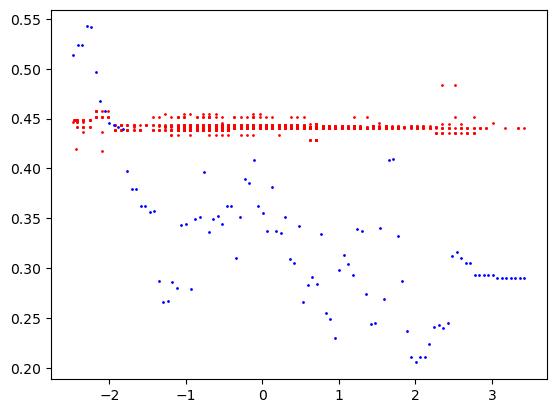

,x,yhat,interpolated
0,-2.470467,0.514230,False
265,-2.470467,NaN,True
427,-2.456751,NaN,True
1120,-2.456751,NaN,True
633,-2.443035,NaN,True
...,...,...,...
1523,3.338184,NaN,True
1192,3.338184,NaN,True
99,3.361569,0.290267,False
694,3.420479,NaN,True


,x,yhat,interpolated
0,-2.470467,0.514230,False
265,-2.470467,0.514801,True
427,-2.456751,0.515372,True
1120,-2.456751,0.515944,True
633,-2.443035,0.516515,True
...,...,...,...
1523,3.338184,0.290267,True
1192,3.338184,0.290267,True
99,3.361569,0.290267,False
694,3.420479,0.290267,True


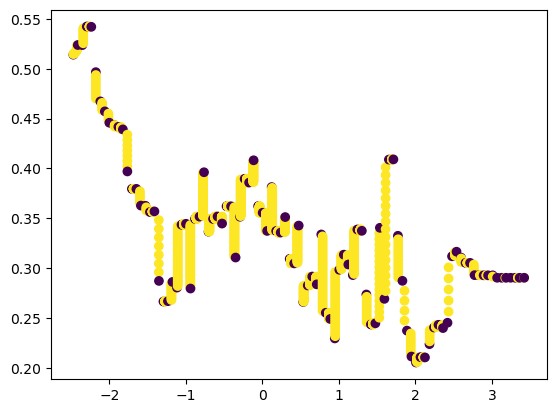

df shape: (1765, 19)
f shape: (101, 3)
combined_df shape: (1866, 3)
f shape: (1765,)
[1]	train-auc:0.67915	test-auc:0.69354
Preparation of a new explainer is initiated

  -> data              : 1765 rows 17 cols
  -> target variable   : 1765 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic Random Forest Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001CEE0AB00E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.324, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.779, mean = 0.00054, max = 0.912
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


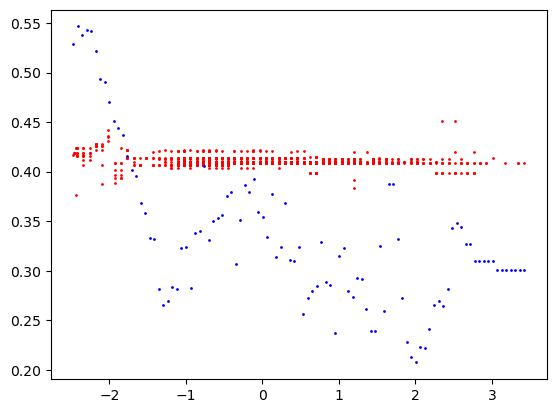

,x,yhat,interpolated
0,-2.470467,0.528394,False
265,-2.470467,NaN,True
427,-2.456751,NaN,True
1120,-2.456751,NaN,True
633,-2.443035,NaN,True
...,...,...,...
1523,3.338184,NaN,True
1192,3.338184,NaN,True
99,3.361569,0.300521,False
694,3.420479,NaN,True


,x,yhat,interpolated
0,-2.470467,0.528394,False
265,-2.470467,0.529455,True
427,-2.456751,0.530516,True
1120,-2.456751,0.531577,True
633,-2.443035,0.532637,True
...,...,...,...
1523,3.338184,0.300521,True
1192,3.338184,0.300521,True
99,3.361569,0.300521,False
694,3.420479,0.300521,True


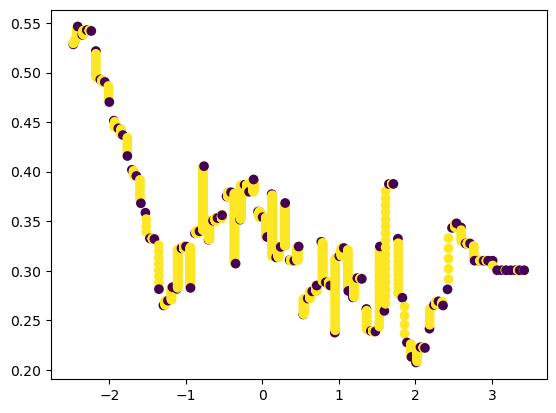

df shape: (1765, 19)
f shape: (101, 3)
combined_df shape: (1866, 3)
f shape: (1765,)
[2]	train-auc:0.69231	test-auc:0.67773
Preparation of a new explainer is initiated

  -> data              : 1765 rows 17 cols
  -> target variable   : 1765 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic Random Forest Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001CEE0AB00E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.325, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.777, mean = -0.00019, max = 0.904
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


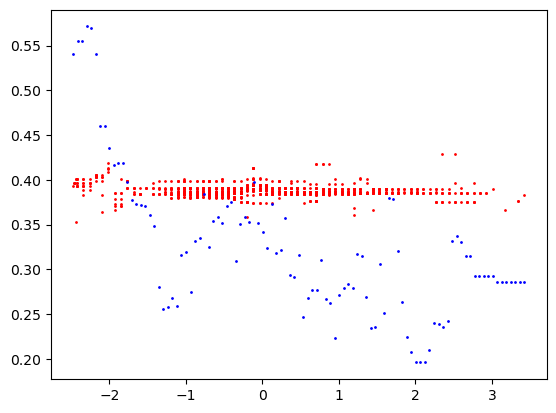

,x,yhat,interpolated
0,-2.470467,0.540507,False
265,-2.470467,NaN,True
427,-2.456751,NaN,True
1120,-2.456751,NaN,True
633,-2.443035,NaN,True
...,...,...,...
1523,3.338184,NaN,True
1192,3.338184,NaN,True
99,3.361569,0.285911,False
694,3.420479,NaN,True


,x,yhat,interpolated
0,-2.470467,0.540507,False
265,-2.470467,0.541389,True
427,-2.456751,0.542271,True
1120,-2.456751,0.543154,True
633,-2.443035,0.544036,True
...,...,...,...
1523,3.338184,0.285911,True
1192,3.338184,0.285911,True
99,3.361569,0.285911,False
694,3.420479,0.285911,True


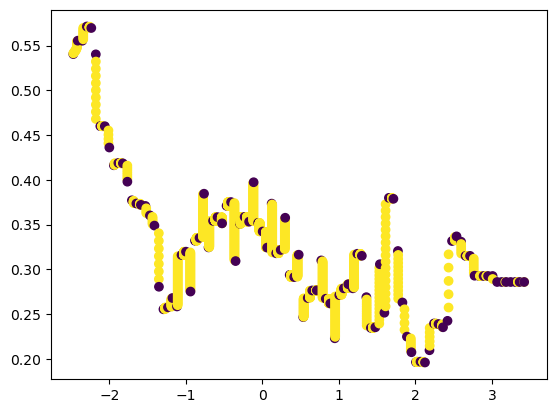

df shape: (1765, 19)
f shape: (101, 3)
combined_df shape: (1866, 3)
f shape: (1765,)
[3]	train-auc:0.65165	test-auc:0.63828
Preparation of a new explainer is initiated

  -> data              : 1765 rows 17 cols
  -> target variable   : 1765 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic Random Forest Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001CEE0AB00E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.325, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.782, mean = -0.000238, max = 0.898
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


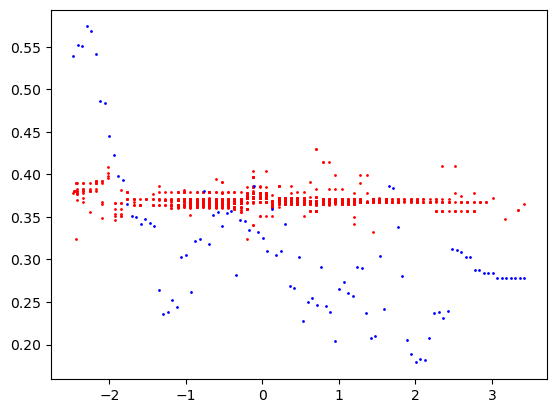

,x,yhat,interpolated
0,-2.470467,0.538683,False
265,-2.470467,NaN,True
427,-2.456751,NaN,True
1120,-2.456751,NaN,True
633,-2.443035,NaN,True
...,...,...,...
1523,3.338184,NaN,True
1192,3.338184,NaN,True
99,3.361569,0.277752,False
694,3.420479,NaN,True


,x,yhat,interpolated
0,-2.470467,0.538683,False
265,-2.470467,0.539458,True
427,-2.456751,0.540232,True
1120,-2.456751,0.541007,True
633,-2.443035,0.541781,True
...,...,...,...
1523,3.338184,0.277752,True
1192,3.338184,0.277752,True
99,3.361569,0.277752,False
694,3.420479,0.277752,True


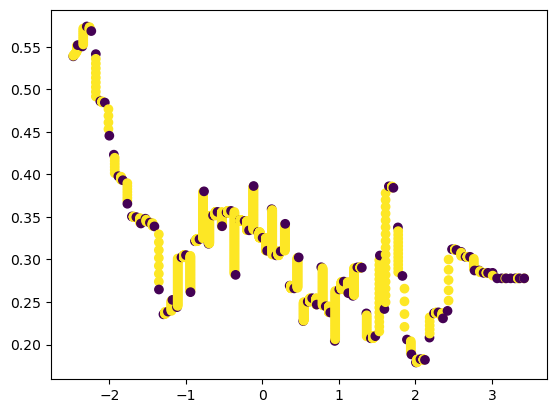

df shape: (1765, 19)
f shape: (101, 3)
combined_df shape: (1866, 3)
f shape: (1765,)
[4]	train-auc:0.66271	test-auc:0.64028
Preparation of a new explainer is initiated

  -> data              : 1765 rows 17 cols
  -> target variable   : 1765 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic Random Forest Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001CEE0AB00E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.324, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.814, mean = 0.000298, max = 0.908
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


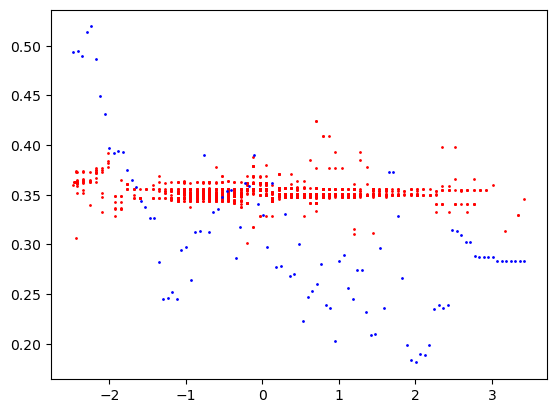

,x,yhat,interpolated
0,-2.470467,0.493697,False
265,-2.470467,NaN,True
427,-2.456751,NaN,True
1120,-2.456751,NaN,True
633,-2.443035,NaN,True
...,...,...,...
1523,3.338184,NaN,True
1192,3.338184,NaN,True
99,3.361569,0.283819,False
694,3.420479,NaN,True


,x,yhat,interpolated
0,-2.470467,0.493697,False
265,-2.470467,0.493751,True
427,-2.456751,0.493804,True
1120,-2.456751,0.493858,True
633,-2.443035,0.493911,True
...,...,...,...
1523,3.338184,0.283819,True
1192,3.338184,0.283819,True
99,3.361569,0.283819,False
694,3.420479,0.283819,True


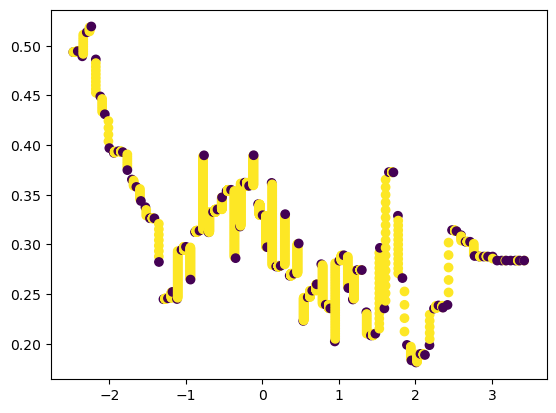

df shape: (1765, 19)
f shape: (101, 3)
combined_df shape: (1866, 3)
f shape: (1765,)
[5]	train-auc:0.66143	test-auc:0.62487
Preparation of a new explainer is initiated

  -> data              : 1765 rows 17 cols
  -> target variable   : 1765 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic Random Forest Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001CEE0AB00E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.325, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.792, mean = -0.000498, max = 0.902
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


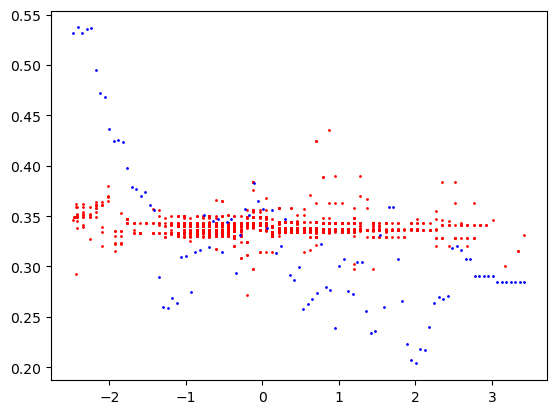

,x,yhat,interpolated
0,-2.470467,0.531227,False
265,-2.470467,NaN,True
427,-2.456751,NaN,True
1120,-2.456751,NaN,True
633,-2.443035,NaN,True
...,...,...,...
1523,3.338184,NaN,True
1192,3.338184,NaN,True
99,3.361569,0.284972,False
694,3.420479,NaN,True


,x,yhat,interpolated
0,-2.470467,0.531227,False
265,-2.470467,0.531577,True
427,-2.456751,0.531928,True
1120,-2.456751,0.532278,True
633,-2.443035,0.532628,True
...,...,...,...
1523,3.338184,0.284972,True
1192,3.338184,0.284972,True
99,3.361569,0.284972,False
694,3.420479,0.284972,True


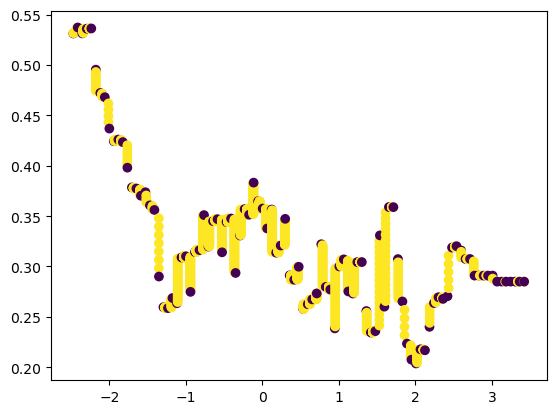

df shape: (1765, 19)
f shape: (101, 3)
combined_df shape: (1866, 3)
f shape: (1765,)
[6]	train-auc:0.64343	test-auc:0.62380
Preparation of a new explainer is initiated

  -> data              : 1765 rows 17 cols
  -> target variable   : 1765 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic Random Forest Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001CEE0AB00E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.325, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.826, mean = -0.000425, max = 0.899
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


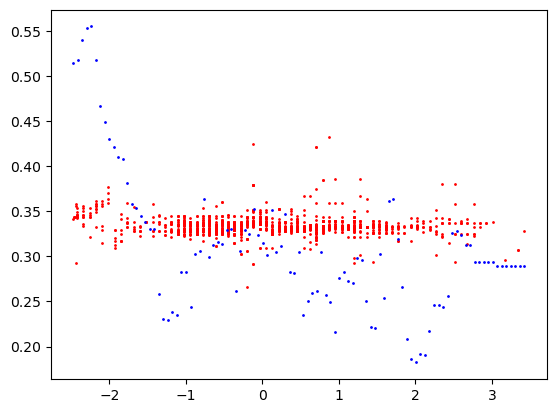

,x,yhat,interpolated
0,-2.470467,0.514471,False
265,-2.470467,NaN,True
427,-2.456751,NaN,True
1120,-2.456751,NaN,True
633,-2.443035,NaN,True
...,...,...,...
1523,3.338184,NaN,True
1192,3.338184,NaN,True
99,3.361569,0.289006,False
694,3.420479,NaN,True


,x,yhat,interpolated
0,-2.470467,0.514471,False
265,-2.470467,0.514673,True
427,-2.456751,0.514875,True
1120,-2.456751,0.515077,True
633,-2.443035,0.515278,True
...,...,...,...
1523,3.338184,0.289006,True
1192,3.338184,0.289006,True
99,3.361569,0.289006,False
694,3.420479,0.289006,True


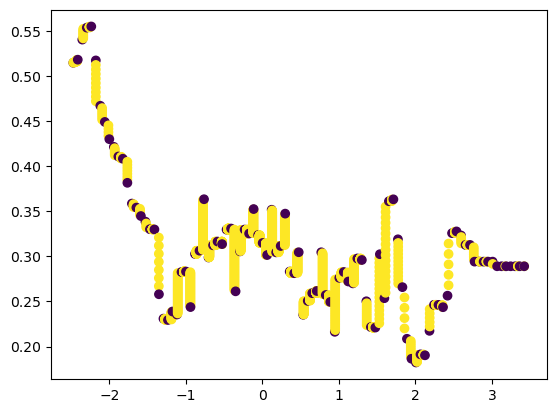

df shape: (1765, 19)
f shape: (101, 3)
combined_df shape: (1866, 3)
f shape: (1765,)
[7]	train-auc:0.63583	test-auc:0.60258
Preparation of a new explainer is initiated

  -> data              : 1765 rows 17 cols
  -> target variable   : 1765 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic Random Forest Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001CEE0AB00E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.326, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.765, mean = -0.00123, max = 0.91
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]


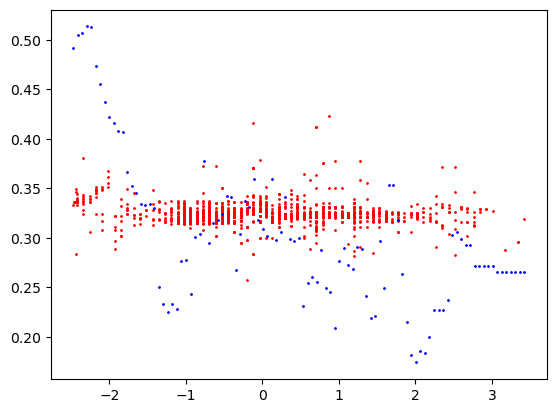

,x,yhat,interpolated
0,-2.470467,0.491477,False
265,-2.470467,NaN,True
427,-2.456751,NaN,True
1120,-2.456751,NaN,True
633,-2.443035,NaN,True
...,...,...,...
1523,3.338184,NaN,True
1192,3.338184,NaN,True
99,3.361569,0.265890,False
694,3.420479,NaN,True


,x,yhat,interpolated
0,-2.470467,0.491477,False
265,-2.470467,0.492267,True
427,-2.456751,0.493057,True
1120,-2.456751,0.493848,True
633,-2.443035,0.494638,True
...,...,...,...
1523,3.338184,0.265890,True
1192,3.338184,0.265890,True
99,3.361569,0.265890,False
694,3.420479,0.265890,True


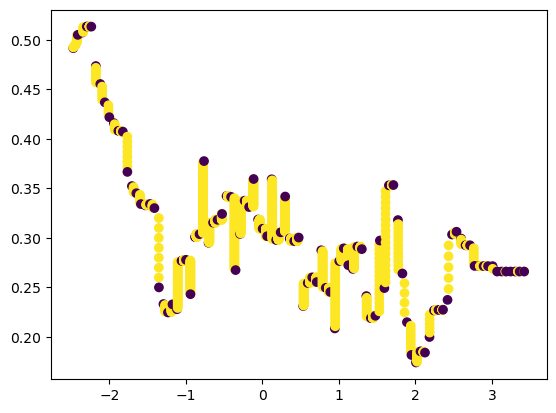

df shape: (1765, 19)
f shape: (101, 3)
combined_df shape: (1866, 3)
f shape: (1765,)
[8]	train-auc:0.62742	test-auc:0.58175
Preparation of a new explainer is initiated

  -> data              : 1765 rows 17 cols
  -> target variable   : 1765 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic Random Forest Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001CEE0AB00E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.325, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.801, mean = -0.000533, max = 0.92
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


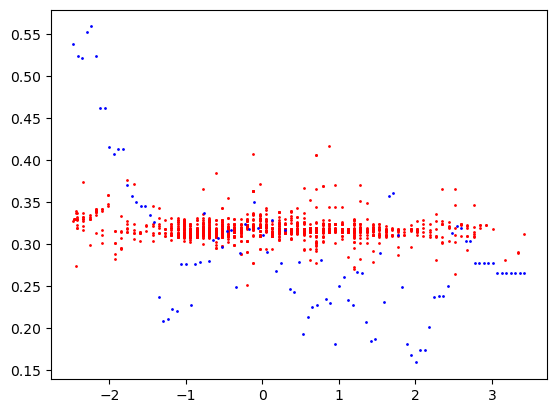

,x,yhat,interpolated
0,-2.470467,0.538037,False
265,-2.470467,NaN,True
427,-2.456751,NaN,True
1120,-2.456751,NaN,True
633,-2.443035,NaN,True
...,...,...,...
1523,3.338184,NaN,True
1192,3.338184,NaN,True
99,3.361569,0.265389,False
694,3.420479,NaN,True


,x,yhat,interpolated
0,-2.470467,0.538037,False
265,-2.470467,0.537229,True
427,-2.456751,0.536421,True
1120,-2.456751,0.535613,True
633,-2.443035,0.534805,True
...,...,...,...
1523,3.338184,0.265389,True
1192,3.338184,0.265389,True
99,3.361569,0.265389,False
694,3.420479,0.265389,True


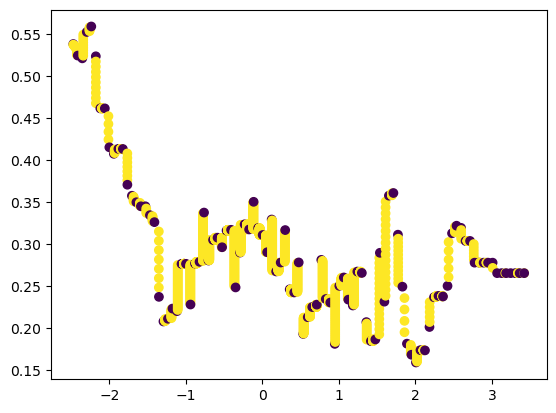

df shape: (1765, 19)
f shape: (101, 3)
combined_df shape: (1866, 3)
f shape: (1765,)
[9]	train-auc:0.61885	test-auc:0.56944
Preparation of a new explainer is initiated

  -> data              : 1765 rows 17 cols
  -> target variable   : 1765 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic Random Forest Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001CEE0AB00E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.325, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.797, mean = 4.36e-05, max = 0.902
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


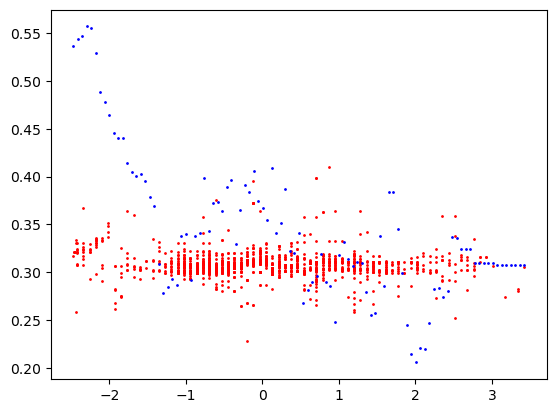

,x,yhat,interpolated
0,-2.470467,0.536689,False
265,-2.470467,NaN,True
427,-2.456751,NaN,True
1120,-2.456751,NaN,True
633,-2.443035,NaN,True
...,...,...,...
1523,3.338184,NaN,True
1192,3.338184,NaN,True
99,3.361569,0.307639,False
694,3.420479,NaN,True


,x,yhat,interpolated
0,-2.470467,0.536689,False
265,-2.470467,0.537081,True
427,-2.456751,0.537473,True
1120,-2.456751,0.537865,True
633,-2.443035,0.538258,True
...,...,...,...
1523,3.338184,0.307639,True
1192,3.338184,0.307639,True
99,3.361569,0.307639,False
694,3.420479,0.307639,True


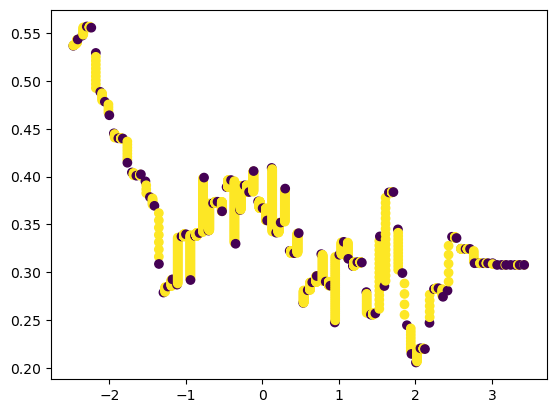

df shape: (1765, 19)
f shape: (101, 3)
combined_df shape: (1866, 3)
f shape: (1765,)
[10]	train-auc:0.62337	test-auc:0.57823
Preparation of a new explainer is initiated

  -> data              : 1765 rows 17 cols
  -> target variable   : 1765 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic Random Forest Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001CEE0AB00E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.326, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.805, mean = -0.00116, max = 0.906
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


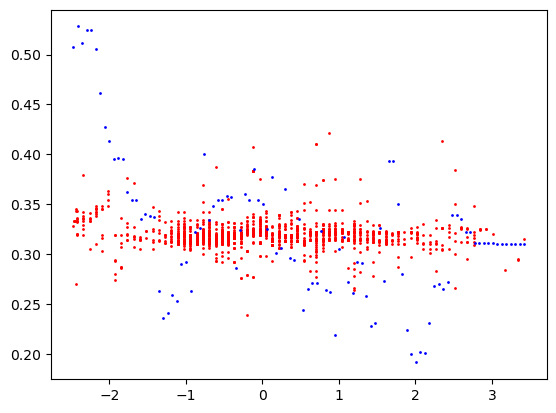

,x,yhat,interpolated
0,-2.470467,0.507794,False
265,-2.470467,NaN,True
427,-2.456751,NaN,True
1120,-2.456751,NaN,True
633,-2.443035,NaN,True
...,...,...,...
1523,3.338184,NaN,True
1192,3.338184,NaN,True
99,3.361569,0.310118,False
694,3.420479,NaN,True


,x,yhat,interpolated
0,-2.470467,0.507794,False
265,-2.470467,0.508988,True
427,-2.456751,0.510182,True
1120,-2.456751,0.511376,True
633,-2.443035,0.512570,True
...,...,...,...
1523,3.338184,0.310118,True
1192,3.338184,0.310118,True
99,3.361569,0.310118,False
694,3.420479,0.310118,True


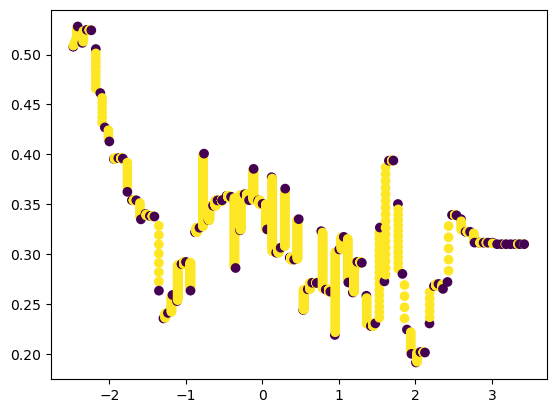

df shape: (1765, 19)
f shape: (101, 3)
combined_df shape: (1866, 3)
f shape: (1765,)
[11]	train-auc:0.60984	test-auc:0.56832
Preparation of a new explainer is initiated

  -> data              : 1765 rows 17 cols
  -> target variable   : 1765 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic Random Forest Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001CEE0AB00E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.323, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.788, mean = 0.00193, max = 0.898
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


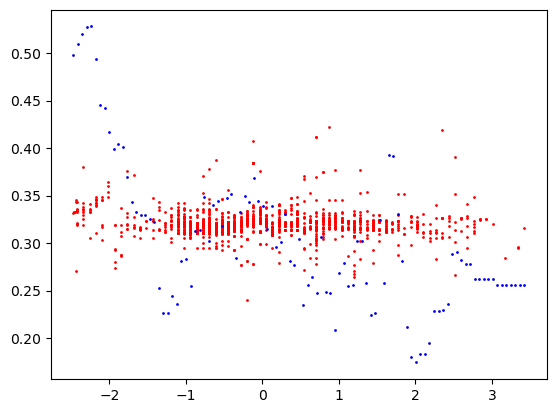

,x,yhat,interpolated
0,-2.470467,0.498000,False
265,-2.470467,NaN,True
427,-2.456751,NaN,True
1120,-2.456751,NaN,True
633,-2.443035,NaN,True
...,...,...,...
1523,3.338184,NaN,True
1192,3.338184,NaN,True
99,3.361569,0.256279,False
694,3.420479,NaN,True


,x,yhat,interpolated
0,-2.470467,0.498000,False
265,-2.470467,0.498658,True
427,-2.456751,0.499317,True
1120,-2.456751,0.499975,True
633,-2.443035,0.500633,True
...,...,...,...
1523,3.338184,0.256279,True
1192,3.338184,0.256279,True
99,3.361569,0.256279,False
694,3.420479,0.256279,True


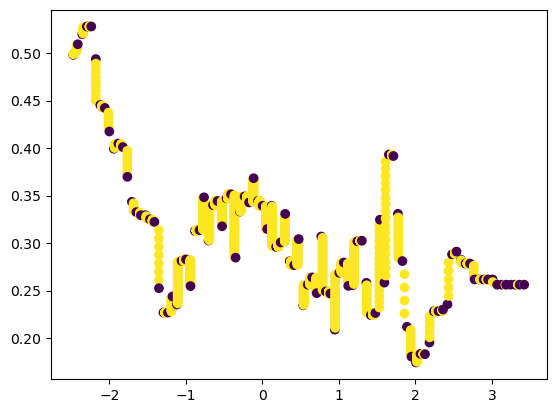

df shape: (1765, 19)
f shape: (101, 3)
combined_df shape: (1866, 3)
f shape: (1765,)
[12]	train-auc:0.60844	test-auc:0.57803
Preparation of a new explainer is initiated

  -> data              : 1765 rows 17 cols
  -> target variable   : 1765 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic Random Forest Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001CEE0AB00E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.324, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.811, mean = 0.000713, max = 0.917
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


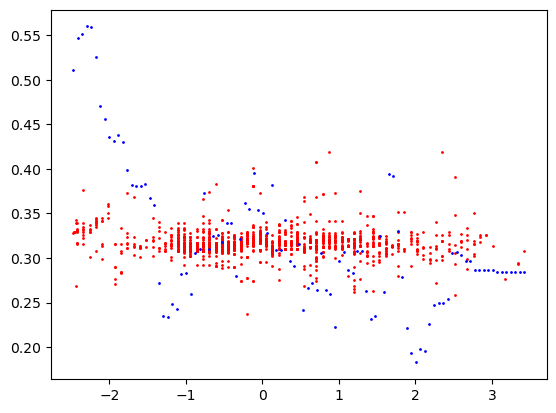

,x,yhat,interpolated
0,-2.470467,0.510810,False
265,-2.470467,NaN,True
427,-2.456751,NaN,True
1120,-2.456751,NaN,True
633,-2.443035,NaN,True
...,...,...,...
1523,3.338184,NaN,True
1192,3.338184,NaN,True
99,3.361569,0.284662,False
694,3.420479,NaN,True


,x,yhat,interpolated
0,-2.470467,0.510810,False
265,-2.470467,0.512923,True
427,-2.456751,0.515037,True
1120,-2.456751,0.517151,True
633,-2.443035,0.519265,True
...,...,...,...
1523,3.338184,0.284662,True
1192,3.338184,0.284662,True
99,3.361569,0.284662,False
694,3.420479,0.284662,True


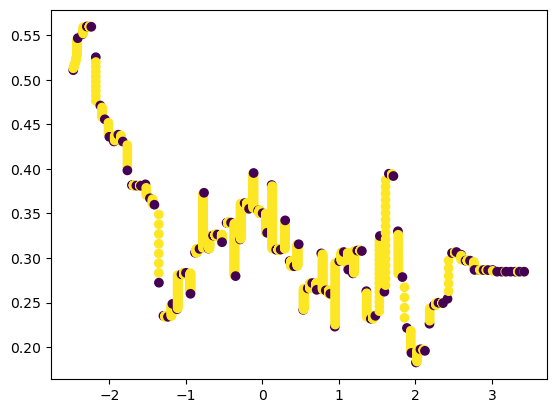

df shape: (1765, 19)
f shape: (101, 3)
combined_df shape: (1866, 3)
f shape: (1765,)
[13]	train-auc:0.60102	test-auc:0.58590
Preparation of a new explainer is initiated

  -> data              : 1765 rows 17 cols
  -> target variable   : 1765 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic Random Forest Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001CEE0AB00E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.325, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.838, mean = -0.00015, max = 0.899
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


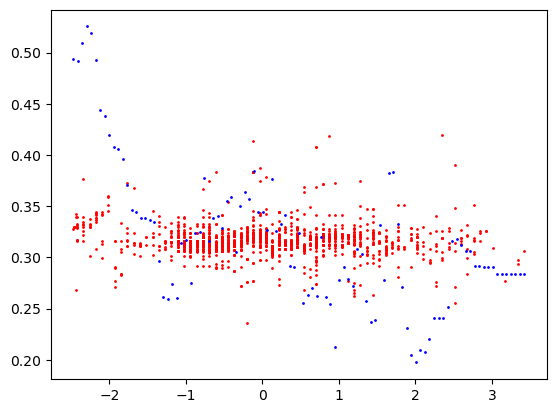

,x,yhat,interpolated
0,-2.470467,0.493940,False
265,-2.470467,NaN,True
427,-2.456751,NaN,True
1120,-2.456751,NaN,True
633,-2.443035,NaN,True
...,...,...,...
1523,3.338184,NaN,True
1192,3.338184,NaN,True
99,3.361569,0.283355,False
694,3.420479,NaN,True


,x,yhat,interpolated
0,-2.470467,0.493940,False
265,-2.470467,0.493813,True
427,-2.456751,0.493687,True
1120,-2.456751,0.493560,True
633,-2.443035,0.493434,True
...,...,...,...
1523,3.338184,0.283355,True
1192,3.338184,0.283355,True
99,3.361569,0.283355,False
694,3.420479,0.283355,True


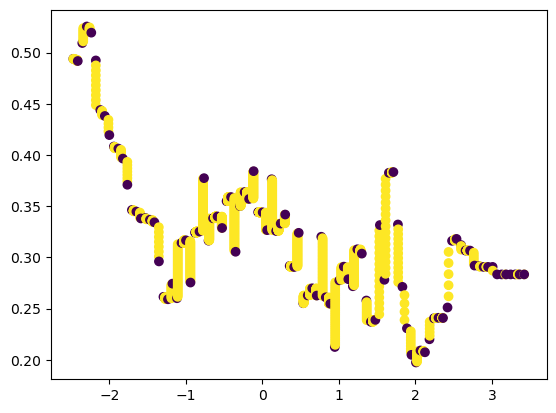

df shape: (1765, 19)
f shape: (101, 3)
combined_df shape: (1866, 3)
f shape: (1765,)
[14]	train-auc:0.60163	test-auc:0.58761


array([[304,   0],
       [138,   0]], dtype=int64)

In [197]:
from sklearn.metrics import confusion_matrix

titanic = dx.datasets.load_titanic()
X = titanic.drop(columns='survived')
y = titanic.survived

numerical_features = X.columns[(X.dtypes == 'float') | (X.dtypes == 'int64')]
numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

categorical_features = X.columns[X.dtypes == 'object']
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X = pd.DataFrame(preprocessor.fit_transform(X))
X.columns = preprocessor.get_feature_names_out()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    "max_depth": 5,
   #  "objective": "binary:logistic",
    "eval_metric": "auc"
}

model = xgb.train(params,
                  dtrain=dtrain,
                  num_boost_round=15,
                  obj=obj_sq,
                  evals=[(dtrain, 'train'), (dtest, 'test')]
                )

results = pd.DataFrame(model.predict(dtest), y_test).reset_index()
results.columns = ['true', 'pred']

results['pred_treshold_0.5'] = results['pred']>0.5
results['pred_treshold_0.5'] = results['pred_treshold_0.5'].astype(int)

results.head(20)
results
conf_matrix = confusion_matrix(results['true'], results['pred_treshold_0.5'])
conf_matrix

In [179]:
params = {
    "max_depth": 5,
   #  "objective": "binary:logistic",
    "eval_metric": "auc"
}

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# accuracy_score(y_test, pred >= 0.5)
# print(y_test)
# print(pred)

exp = dx.Explainer(rf, X, y, label = "Titanic Random Forest Pipeline")
pdp = exp.model_profile(variables = ['num__age'])#, 'num__fare'])
df = pdp.result
# # pdp.plot(geom='profiles')

# # plt.scatter(df._x_, df._yhat_)
# # plt.xlabel('x')
# # plt.ylabel('yhat')

f = df[['_x_', '_yhat_']]
f



Preparation of a new explainer is initiated

  -> data              : 2207 rows 17 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2207 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic Random Forest Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001CEE0AB00E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.323, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.9, mean = -0.000659, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]


,_x_,_yhat_
0,-2.491041,0.538155
1,-2.430279,0.539422
2,-2.369518,0.537889
3,-2.308757,0.544522
4,-2.247996,0.555622
...,...,...
96,3.342024,0.303089
97,3.402785,0.303089
98,3.463546,0.303089
99,3.524307,0.303089


In [11]:
import numpy as np
from typing import Tuple
import xgboost as xgb
import dalex as dx
import preprocessing as pp

ModuleNotFoundError: No module named 'preprocessing'

In [10]:
def softprob_obj(labels: np.ndarray, predt: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    def softmax(x):
        """Compute softmax values for each sets of scores in x."""
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum()
    
    rows = labels.shape[0]
    classes = predt.shape[1]
    grad = np.zeros((rows, classes), dtype=float)
    hess = np.zeros((rows, classes), dtype=float)
    eps = 1e-6
    for r in range(predt.shape[0]):
        target = labels[r]
        p = softmax(predt[r, :])
        for c in range(predt.shape[1]):
            g = p[c] - 1.0 if c == target else p[c]
            h = max((2.0 * p[c] * (1.0 - p[c])).item(), eps)
            grad[r, c] = g
            hess[r, c] = h

    grad = grad.reshape((rows * classes, 1))
    hess = hess.reshape((rows * classes, 1))
    return grad, hess

clf = xgb.XGBClassifier(tree_method="hist", objective=softprob_obj)

titanic = dx.datasets.load_titanic()
X = titanic.drop(columns='survived')
y = titanic.survived

clf.fit(X, y)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:gender: object, class: object, embarked: object